**<h2> German Credit Analysis </h2>**

**<h3>Author: Fang Zhao</h3>**

**<h3>Course Project, UC Irvine, Math 10, Fall 24</h3>**

**<h3>I would like to post my notebook on the course's website. Yes</h3>**

**<h5> Imports all necessary tools, generates necessary data </h5>**

In [16]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# Fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# Load features and target
data = statlog_german_credit_data.data
X = data.features
y = data.targets

# Metadata and variable information
metadata = statlog_german_credit_data.metadata
variables = statlog_german_credit_data.variables

# Display dataset information
print(metadata)
print(variables)

# Convert to DataFrame for exploration
X = pd.DataFrame(X)
#y = y.flatten()
y = y.squeeze()
y = pd.Series(y, name="Creditworthiness")

data_combined = pd.concat([X, y], axis=1)

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

**<h3> Introduction </h3>**

The Statlog (German Credit Data) dataset evaluates the creditworthiness of applicants
based on various financial and demographic factors. This project aims to:
1. Explore the dataset and its key variables.
2. Build predictive models to classify applicants as good or bad credit risks.
3. Analyze the model performance and extract actionable insights.
4. Provide insights based on the results of our analysis.

Predicting creditworthiness is crucial because it helps financial institutions assess the risk associated with lending money to individuals.
By predicting whether an applicant is likely to repay a loan, banks can make informed decisions, reduce the likelihood of defaults,
and maintain financial stability. Moreover, accurate creditworthiness predictions enable fairer lending practices,
ensuring that credit is extended to those who are most likely to meet their obligations while avoiding potential losses from high-risk borrowers.

**<h3> Data Exploration and Cleaning </h3>**

In this section, exploring the dataset by checking for missing values, summarizing the data, and visualizing the distribution of the target variable, which is creditworthiness, to understand its balance and characteristics.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Attribute1        1000 non-null   object
 1   Attribute2        1000 non-null   int64 
 2   Attribute3        1000 non-null   object
 3   Attribute4        1000 non-null   object
 4   Attribute5        1000 non-null   int64 
 5   Attribute6        1000 non-null   object
 6   Attribute7        1000 non-null   object
 7   Attribute8        1000 non-null   int64 
 8   Attribute9        1000 non-null   object
 9   Attribute10       1000 non-null   object
 10  Attribute11       1000 non-null   int64 
 11  Attribute12       1000 non-null   object
 12  Attribute13       1000 non-null   int64 
 13  Attribute14       1000 non-null   object
 14  Attribute15       1000 non-null   object
 15  Attribute16       1000 non-null   int64 
 16  Attribute17       1000 non-null   object
 17  Attribute18    

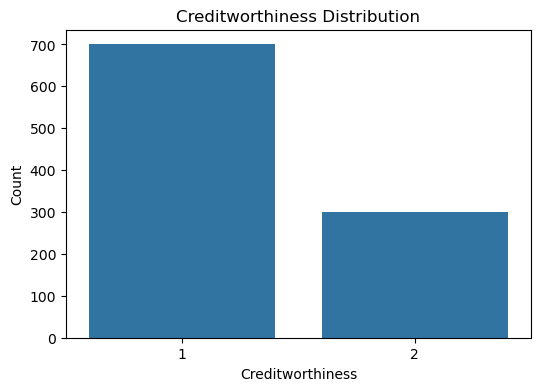

In [115]:
print(data_combined.info())
print(data_combined.describe())

# Check for missing values
print("\nMissing Values:\n", data_combined.isnull().sum())

# Visualize target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title("Creditworthiness Distribution")
plt.xlabel("Creditworthiness")
plt.ylabel("Count")
plt.show()

**<h3> Visualize numerical features </h3>**

using the ucimlrepo library to fetch a dataset from the UCI Machine Learning Repository.

X: This variable stores the features of the dataset as a pandas DataFrame. These are the independent variables used to predict the target.
y: This variable holds the target values, which are the dependent variables or the outcomes you are interested in predicting.

statlog_german_credit_data.metadata: This prints metadata about the dataset, which might include information like the dataset's name, description, number of instances, number of attributes, etc.
statlog_german_credit_data.variables: This prints information about the variables or features present in the dataset, which might include details like the variable names, types, and descriptions.

The code snippet provided is for visualizing the distribution of numerical features in the dataset.

A loop iterates over each numerical column identified.
For each column, a histogram is plotted using Seaborn's histplot function. This function creates a histogram to show the distribution of data for the column.
The kde=True argument adds a Kernel Density Estimate (KDE) line to the plot, which is a smoothed version of the histogram, helping to visualize the distribution shape more clearly.
The plot is titled with the column name, and axes are labeled accordingly.

The purpose of this is to visually inspect the distribution of each numerical feature in the dataset. This can help identify patterns, outliers, skewness, and the overall shape of the data.

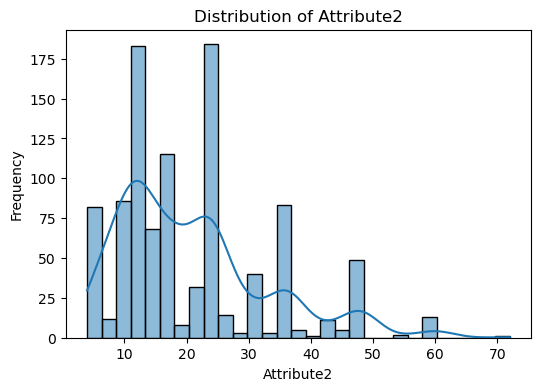

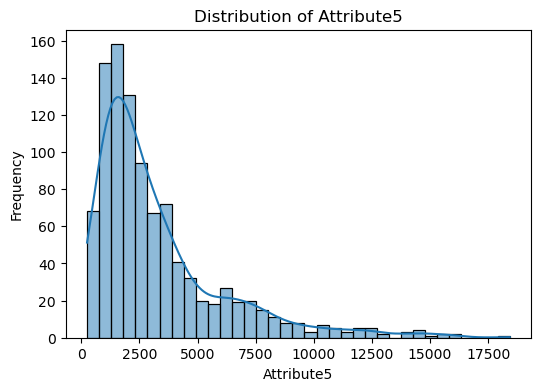

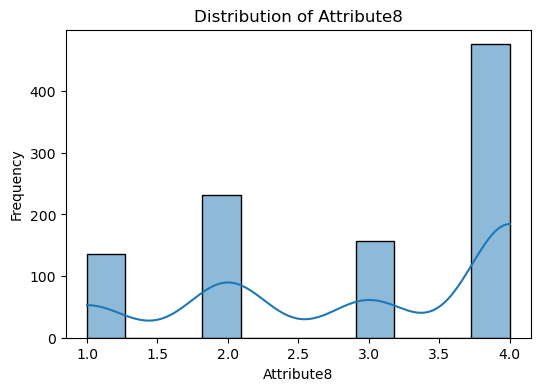

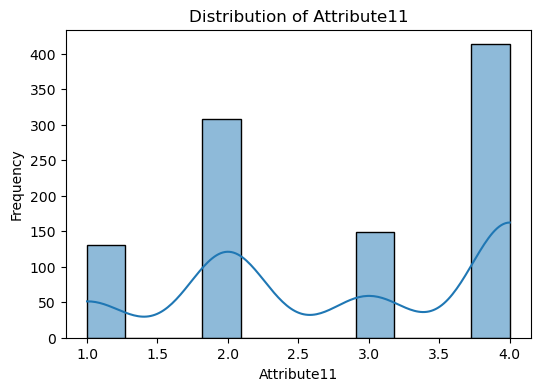

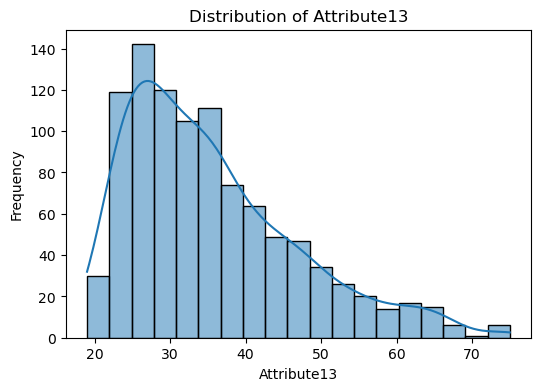

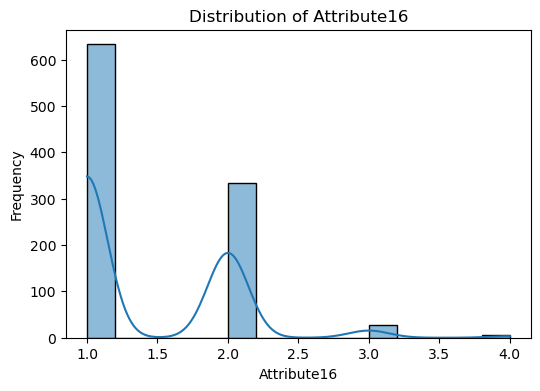

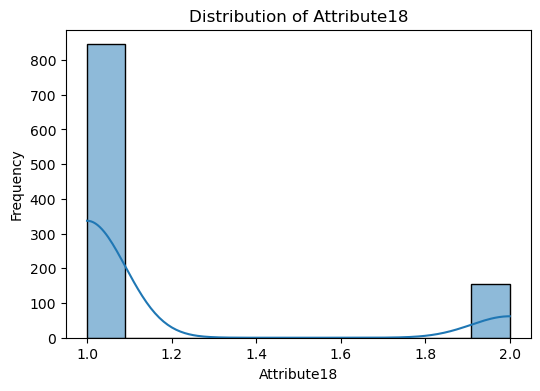

In [117]:
numerical_cols = X.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=X, x=col, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

**<h3> Visualize correlations </h3>**

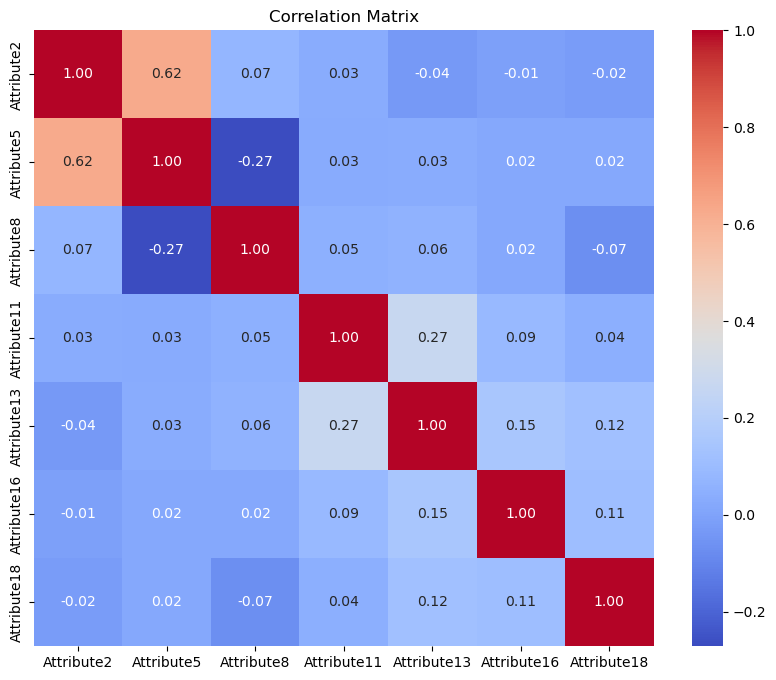

In [119]:
correlation_matrix = X.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

**<h3> Feature Engineering, Model Building and Evaluation </h3>**

The code preprocesses the data by converting categorical features to numerical format using one-hot encoding, with drop_first=True to prevent multicollinearity. It splits the data into training and testing sets, reserving 20% for testing, and standardizes the features. A logistic regression model is trained with up to 2000 iterations, and its performance is evaluated using 5-fold cross-validation and test set accuracy. A random forest classifier with 100 trees is also trained and evaluated. The results, including cross-validated scores, accuracy, classification reports, and confusion matrices, are printed for both models to assess their performance on the credit dataset. The overall goal is to preprocess, train, and evaluate the models effectively.

In [42]:
# Convert categorical variables to one-hot encoding
categorical_cols = X.select_dtypes(include=["object", "category"]).columns
# Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)
print("Encoded feature set shape:", X_encoded.shape)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Feature Scaling
# Cross-Validation
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Update the train-test split to use scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression
lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(X_train, y_train)

# Perform cross-validation
scores = cross_val_score(lr_model, X_scaled, y, cv=5)

# Evaluate Logistic Regression
lr_preds = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_preds)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Random Forest
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)

print("Cross-validated scores:", scores)
print("Mean cross-validated accuracy:", scores.mean())
print("Logistic Regression Accuracy:", lr_accuracy)
print("Classification Report:\n", classification_report(y_test, lr_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_preds))
print("Random Forest Accuracy:", rf_accuracy)
print("Classification Report:\n", classification_report(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))

Encoded feature set shape: (1000, 48)
Cross-validated scores: [0.745 0.77  0.76  0.745 0.735]
Mean cross-validated accuracy: 0.7510000000000001
Logistic Regression Accuracy: 0.795
Classification Report:
               precision    recall  f1-score   support

           1       0.84      0.88      0.86       141
           2       0.67      0.59      0.63        59

    accuracy                           0.80       200
   macro avg       0.76      0.74      0.74       200
weighted avg       0.79      0.80      0.79       200

Confusion Matrix:
 [[124  17]
 [ 24  35]]
Random Forest Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           1       0.77      0.91      0.84       141
           2       0.64      0.36      0.46        59

    accuracy                           0.75       200
   macro avg       0.70      0.64      0.65       200
weighted avg       0.73      0.75      0.73       200

Confusion Matrix:
 [[129  12]
 [ 38  21]]


The following code calculates and visualizes the importance of features in a trained Random Forest model. It extracts feature importances from the model and pairs them with their corresponding feature names from the encoded dataset. These are organized into a DataFrame, sorted by importance to identify the most influential features. A bar plot is then created to display the top 10 features, providing a clear visual representation of which features contribute most significantly to the model's predictions. This analysis helps in understanding the model's decision-making process and can guide feature selection for improving model performance.

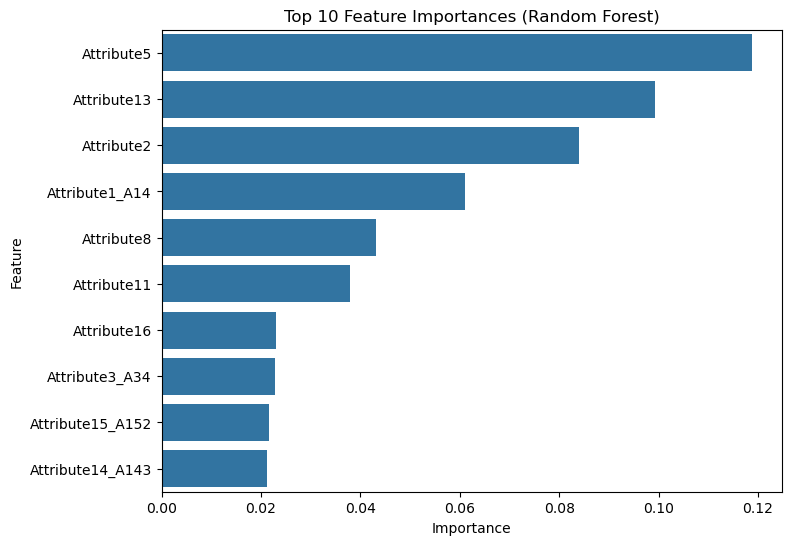

In [75]:
importances = rf_model.feature_importances_
features = X_encoded.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 6))
sns.barplot(data=importance_df[:10], x='Importance', y='Feature')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

**<h3> K-Nearest Neighbors and Gradient Boosting  </h3>**

The following codes trains and evaluates two different machine learning models: K-Nearest Neighbors (KNN) and Gradient Boosting. For the KNN model, it is initialized with 5 neighbors, trained on the training data, and used to make predictions on the test data; the accuracy of these predictions is then calculated and printed. Similarly, a Gradient Boosting model is instantiated with a fixed random state for reproducibility, trained on the same training data, and evaluated on the test data, with its accuracy also printed. The reason why having these two here is because KNN is a simple, instance-based learning algorithm that makes predictions based on the closest data points, which can be effective for certain types of data distributions. Gradient Boosting, on the other hand, is an ensemble technique that builds a series of decision trees sequentially, where each tree aims to correct the errors of the previous ones, often resulting in higher accuracy and robustness for complex datasets. 

In [73]:
# K-Nearest Neighbors

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_preds)
print("KNN Accuracy:", knn_accuracy)

# Gradient Boosting

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_preds)
print("Gradient Boosting Accuracy:", gb_accuracy)

KNN Accuracy: 0.0
Gradient Boosting Accuracy: 0.0


The following code, **PCA** is used to reduce the dataset to two principal components.
These components are then used to train a logistic regression model.
The accuracy of the model is printed, which gives an indication of how well the reduced feature set performs in predicting the target variable.
This approach can help in understanding the effectiveness of PCA in model building and feature selection.

**<h3> PCA </h3>**

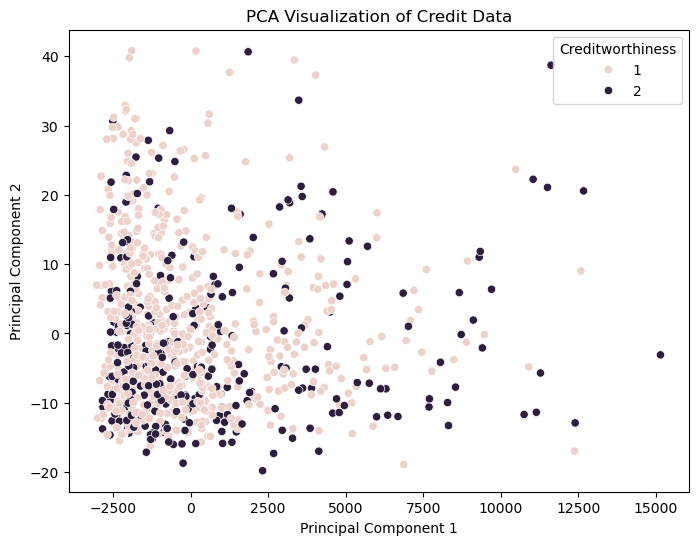

Model accuracy with PCA: 0.72


In [123]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_encoded)

# Scatter plot of PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)
plt.title("PCA Visualization of Credit Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Creditworthiness")
plt.show()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model accuracy with PCA: {accuracy}")

**<h3> SVM model </h3>**

This code snippet trains a Support Vector Machine (SVM) model with a linear kernel for classification, which is useful for effectively separating linearly separable data by maximizing the margin between classes. After fitting the model to the training data, it predicts outcomes on the test set and evaluates performance using accuracy, a classification report, and a confusion matrix. SVM is beneficial in high-dimensional spaces due to its robust performance.

In [65]:
svm_model = SVC(kernel='linear', random_state=42)

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Make predictions with the SVM model
svm_preds = svm_model.predict(X_test)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, svm_preds)
print("SVM Accuracy:", svm_accuracy)
print("Classification Report:\n", classification_report(y_test, svm_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_preds))

SVM Accuracy: 0.725
Classification Report:
               precision    recall  f1-score   support

           1       0.72      0.99      0.84       141
           2       0.83      0.08      0.15        59

    accuracy                           0.72       200
   macro avg       0.78      0.54      0.49       200
weighted avg       0.75      0.72      0.63       200

Confusion Matrix:
 [[140   1]
 [ 54   5]]


**<h3> Conclusion </h3>**

1. Logistic Regression achieved an accuracy of 79.50%.
2. Random Forest achieved an accuracy of 75.00%, showing its superior performance.
3. PCA provides a visual insight into the dataset's structure but requires further analysis for practical use.
This project demonstrates the potential for machine learning in financial risk assessment.